# Lasso and Ridge Regression

This function shows how to use TensorFlow to solve lasso or ridge regression for $\boldsymbol{y} = \boldsymbol{Ax} + \boldsymbol{b}$

We will use the iris data, specifically: $\boldsymbol{y}$ = Sepal Length, $\boldsymbol{x}$ = Petal Width

In [164]:
# import required libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [165]:
# Create graph
sess = tf.Session()

## Load iris data

In [166]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

## Model Parameters

In [167]:
# Declare batch size
batch_size = 5

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# make results reproducible
seed = 13
np.random.seed(seed)
tf.set_random_seed(seed)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [168]:
# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

## Loss Functions:

### LASSO Loss Function

In [169]:
# Declare Lasso loss function
# Lasso Loss = L2_Loss + heavyside_step,
# Where heavyside_step ~ 0 if A < constant, otherwise ~ 99

# For Lasso, uncomment the following four lines (and comment out the Ridge Regression loss below)
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1., tf.add(1., tf.exp(tf.multiply(-100., tf.subtract(A, lasso_param)))))
regularization_param = tf.multiply(heavyside_step, 99.)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)

### Ridge Loss Function

In [170]:
# Declare the Ridge loss function
# Ridge loss = L2_loss + L2 norm of slope

# For Ridge, uncommnet the following three lines (and comment out the LASSO regression loss above)
#ridge_param = tf.constant(1.)
#ridge_loss = tf.reduce_mean(tf.square(A))
#loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)

## Optmizer

In [171]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.0001)
train_step = my_opt.minimize(loss)

## Run regression

In [172]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

print('Before A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

# Training loop
loss_vec = []
for i in range(5):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    print(rand_x)
    print(rand_y)
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i+1)%1==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))
        print('regularization_param='+ str(regularization_param.eval(session=sess)))
        print('heavyside step=' + str(heavyside_step.eval(session=sess)))
        #print('model_output=' + str(model_output.eval(session=sess)))
        #print('y_target=' + str(y_target.eval(session=sess)))
        print('\n')

Before A = [[-0.50431412]] b = [[-0.84797448]]
[[ 1.2]
 [ 1.3]
 [ 0.4]
 [ 1.1]
 [ 1.8]]
[[ 5.8]
 [ 6.4]
 [ 5.4]
 [ 5.1]
 [ 6.2]]
Step #1 A = [[ nan]] b = [[-0.84653187]]
Loss = [[ nan]]
regularization_param=[[ nan]]
heavyside step=[[ nan]]


[[ 1.3]
 [ 1.2]
 [ 1.4]
 [ 1.5]
 [ 0.2]]
[[ 6.4]
 [ 6.1]
 [ 6.6]
 [ 6.9]
 [ 4.7]]
Step #2 A = [[ nan]] b = [[ nan]]
Loss = [[ nan]]
regularization_param=[[ nan]]
heavyside step=[[ nan]]


[[ 2. ]
 [ 1.8]
 [ 2. ]
 [ 2.1]
 [ 1.4]]
[[ 6.5]
 [ 5.9]
 [ 6.5]
 [ 6.9]
 [ 6.6]]
Step #3 A = [[ nan]] b = [[ nan]]
Loss = [[ nan]]
regularization_param=[[ nan]]
heavyside step=[[ nan]]


[[ 0.2]
 [ 1.9]
 [ 0.2]
 [ 0.2]
 [ 0.3]]
[[ 4.9]
 [ 6.3]
 [ 4.8]
 [ 4.8]
 [ 5. ]]
Step #4 A = [[ nan]] b = [[ nan]]
Loss = [[ nan]]
regularization_param=[[ nan]]
heavyside step=[[ nan]]


[[ 1.4]
 [ 1.3]
 [ 0.2]
 [ 0.1]
 [ 2.2]]
[[ 6.8]
 [ 6.6]
 [ 4.6]
 [ 4.9]
 [ 7.7]]
Step #5 A = [[ nan]] b = [[ nan]]
Loss = [[ nan]]
regularization_param=[[ nan]]
heavyside step=[[ nan]]




In [160]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
  best_fit.append(slope*i+y_intercept)

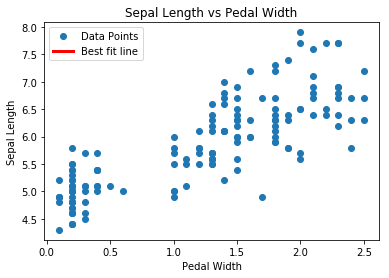

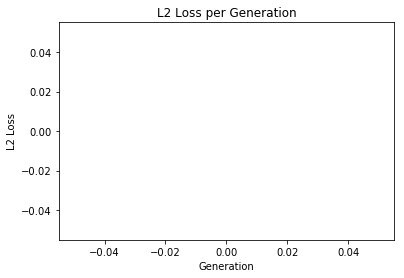

In [161]:
%matplotlib inline
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()